Epoch: 0 Cost: [0.72339969]
Epoch: 100 Cost: [0.50959972]
Epoch: 200 Cost: [0.42552146]
Epoch: 300 Cost: [0.37553112]
Epoch: 400 Cost: [0.34232442]
Epoch: 500 Cost: [0.31847983]
Epoch: 600 Cost: [0.30039427]
Epoch: 700 Cost: [0.28611921]
Epoch: 800 Cost: [0.27450818]
Epoch: 900 Cost: [0.26484079]
Epoch: 1000 Cost: [0.25671617]


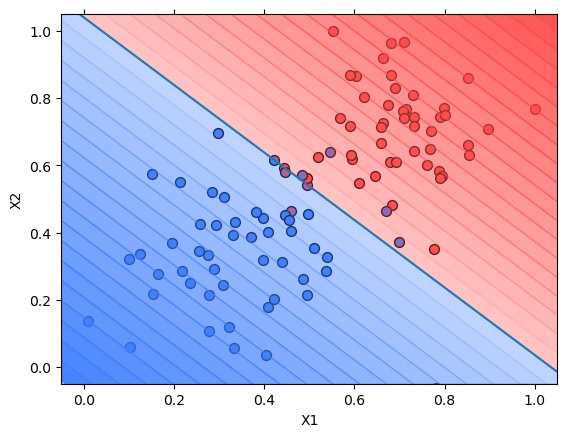

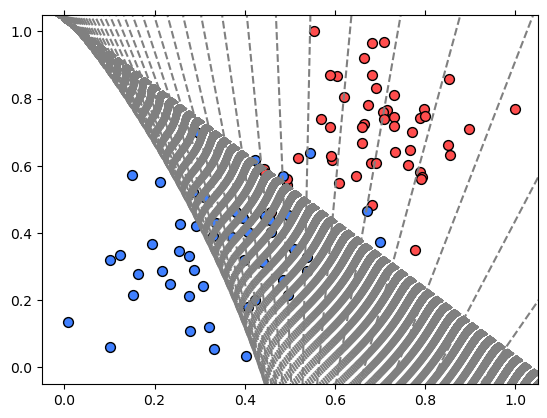

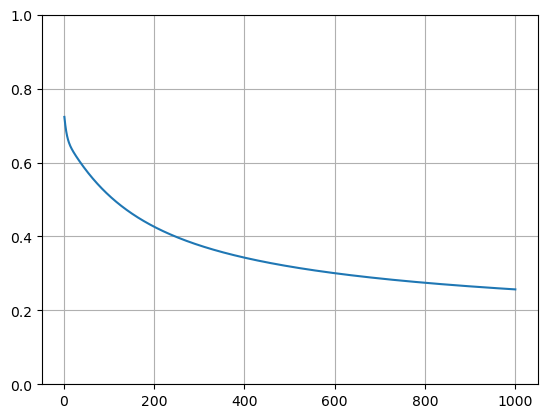

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.pyplot as mpl
import random

%matplotlib inline


# Cargamos data
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])

#sigmoid
def sigmoid(x):
    return 1/(1 + np.exp(-x))

w1= 2*np.random.rand(1) - 1
w2= 2*np.random.rand(1) - 1
b= 2*np.random.rand(1) - 1

# algoritmo gradiente descendiente

learning_rate = 0.01
num_epochs = 1000
lineas = []
costo = []
# bucle de entrenamiento
for i in range(num_epochs):
    cost = 0
    for j in range(X.shape[0]):
        z = w1 * X[j,0] + w2 *X[j,1] + b
        y1 = sigmoid(z)

        # errores
        error = y1 - y[j]

        # gradientes derivadas 
        dw1 = error*y1*(1-y1)*X[j,0]
        dw2 = error*y1*(1-y1)*X[j,1]
        db = error*y1*(1-y1)

        # actualizacion de pesos y bias
        w1 = w1 - learning_rate*dw1
        w2 = w2 - learning_rate*dw2
        b = b - learning_rate*db

        # calculo de la entropia cruzada
        cost += -y[j]*np.log(y1) - (1-y[j])*np.log(1-y1)

    # lineas generadas en cada epoca
    lineas.append((-w1/w2, -b/w2))
    # funcion error
    costo.append(cost) 
    # division de la variable de costo total por el numero total de ejemplos
    cost /= X.shape[0]
    
    if i % 100 == 0:
        print("Epoch:", i, "Cost:", cost)
print("Epoch:", i+1, "Cost:", cost)
# Estilo Plot
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', top='off')

# pendiente
solution_slope = -w1/w2
#intercepto
solution_intercept = -b/w2

x = np.arange(-10.0, 10.0, 0.1)
y2 = (solution_slope * x) + solution_intercept


# Scatter para el grafico
red = [1,0.3,0.3]
blue = [0.25,0.5,1]
red_points = X[np.argwhere(y==0).flatten()]
blue_points = X[np.argwhere(y==1).flatten()]
plt.scatter(red_points[:,0], red_points[:,1], s=50, color=red, edgecolor='k')
plt.scatter(blue_points[:,0], blue_points[:,1], s=50, color=blue, edgecolor='k')

                 
# Plotea líneas y regiones solución.
plt.plot(x, y2)

plt.fill_between(x, solution_slope*x+solution_intercept, -0.05, color=blue, alpha=0.3)
plt.fill_between(x, solution_slope*x+solution_intercept, 1.05, color=red, alpha=0.3)

gh = np.mean(solution_slope)
gj = np.mean(solution_intercept)

tad = np.arange(-10.0, 10.0, 0.1)

interx = ((-1)*(gj))/gh
interxs = (1.1-gj)/gh

ar = 20
rir = ((-1)*(interx+0.15))/ar
ri = gh*rir

rsr = ((-1)*(1.06-interxs))/ar
rs = gh*rsr
ro = 1/20
ol = 1

for ol in range(ar):
  plt.fill_between(tad, gh*tad+(gj-(ri*(ol-1))), gh*tad+(gj-(ri*ol)), color=blue, alpha=(ro*ol))
  plt.fill_between(tad, gh*tad+(gj+(rs*(ol-1))), gh*tad+(gj+(rs*ol)), color=red, alpha=(ro*ol))

# Etiquetas de los ejes
plt.xlabel('X1')
plt.ylabel('X2')

# lineas generadas en cada epoca
fig = plt.figure()
fig.clf()
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', top='off')
x = np.arange(-10.0, 10.0, 0.1)
for line in lineas:
    slope = line[0]
    intercept = line[1]
    plt.plot(x, slope*x+intercept, linestyle='dashed', color='gray')

# Scatter para el grafico
red = [1,0.3,0.3]
blue = [0.25,0.5,1]
red_points = X[np.argwhere(y==0).flatten()]
blue_points = X[np.argwhere(y==1).flatten()]
plt.scatter(red_points[:,0], red_points[:,1], s=50, color=red, edgecolor='k')
plt.scatter(blue_points[:,0], blue_points[:,1], s=50, color=blue, edgecolor='k')

# funcion error
fig1 = plt.figure()
fig1.clf()
plt.ylim(0,1)
epocas=list(np.arange(1,num_epochs+1))
plt.plot(epocas,costo)
plt.grid()
# Muestra el gráfico
plt.show()